# Mini_project_3

1. import all the required library
2. load the dataset
3. EDA
4. Feature Engineering 
5. PCA
6. Modeling
7. Validation 

## import all required libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew,zscore
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# load the dataset

stroke_df = pd.read_csv('stroke_data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_df.shape

(5110, 12)

## EDA

In [4]:
#Create a copy file of the stock data for doing all tasks.

In [5]:
St_df = stroke_df.copy()

### DataType

In [6]:
St_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Five number summary / Basic Statistic

In [7]:
St_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Check null Values

In [8]:
St_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# BMI features have a missing values that the percentage of overall data 3% of missing values in have.

St_df['bmi'].fillna(St_df['bmi'].mode()[0],inplace=True)

In [10]:
St_df['bmi'].isna().sum()

0

In [11]:
# Separate the all type of features.like continuous, discrete categorical.

In [12]:
discrete_df = St_df[['hypertension','heart_disease','stroke']]
continues_df = St_df[['age','avg_glucose_level','bmi']]
categorical_df = St_df.select_dtypes(include='object')

## Data Visualization 

### 1) Continuous data

In [13]:
continues_df.head(2)

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.7


In [14]:
# Functions for detective outliers and return their names

def Outliers_name(data):
    out = []
    for col in data.columns:
        column = sorted(data[col])
        Q1 = np.quantile(column,0.25)
        Q3 = np.quantile(column,0.75)
        IQR = Q3 - Q1
        lower,upper = Q1-(1.5* IQR),Q3 + (1.5 * IQR)
        if ((column>upper) | (column<lower)).any():
            out.append(col)
    return out
    
def Outliers_show(data):
    print("All Features that have Outliers --->",Outliers_name(data))
    fig, axes = plt.subplots(1,len(data.columns),figsize=(15, 5))
    for i,col in enumerate(data.columns):
        sns.boxplot(data[col],ax=axes[i])
        axes[i].set_title(col)
    plt.show()
        

All Features that have Outliers ---> ['avg_glucose_level', 'bmi']


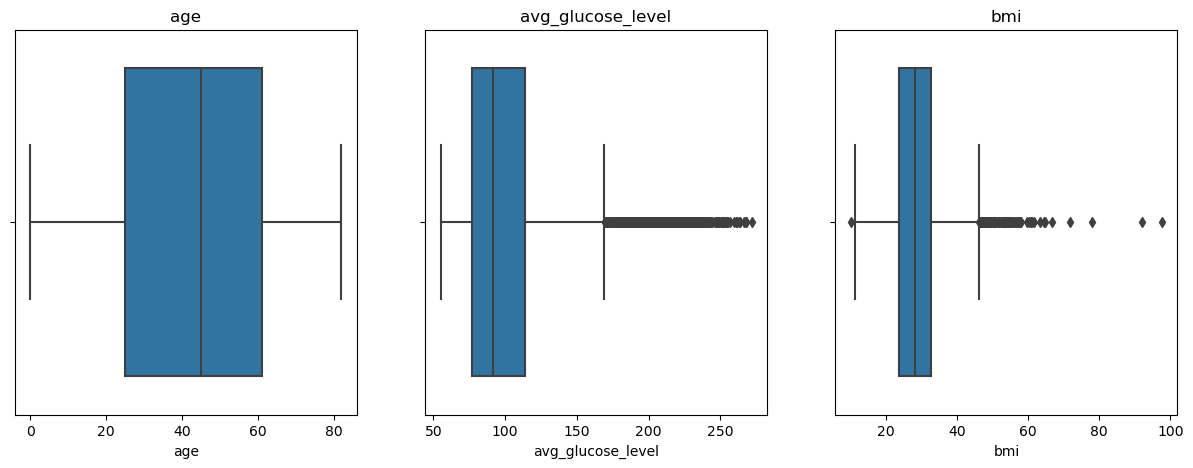

In [15]:
Outliers_show(continues_df,)

Column_Name       Skewness

age ---> -0.1370190866396024

Column_Name       Skewness

avg_glucose_level ---> 1.571822297397199

Column_Name       Skewness

bmi ---> 1.0793233201555579


List of Fetures High Skewness ---> ['avg_glucose_level', 'bmi']


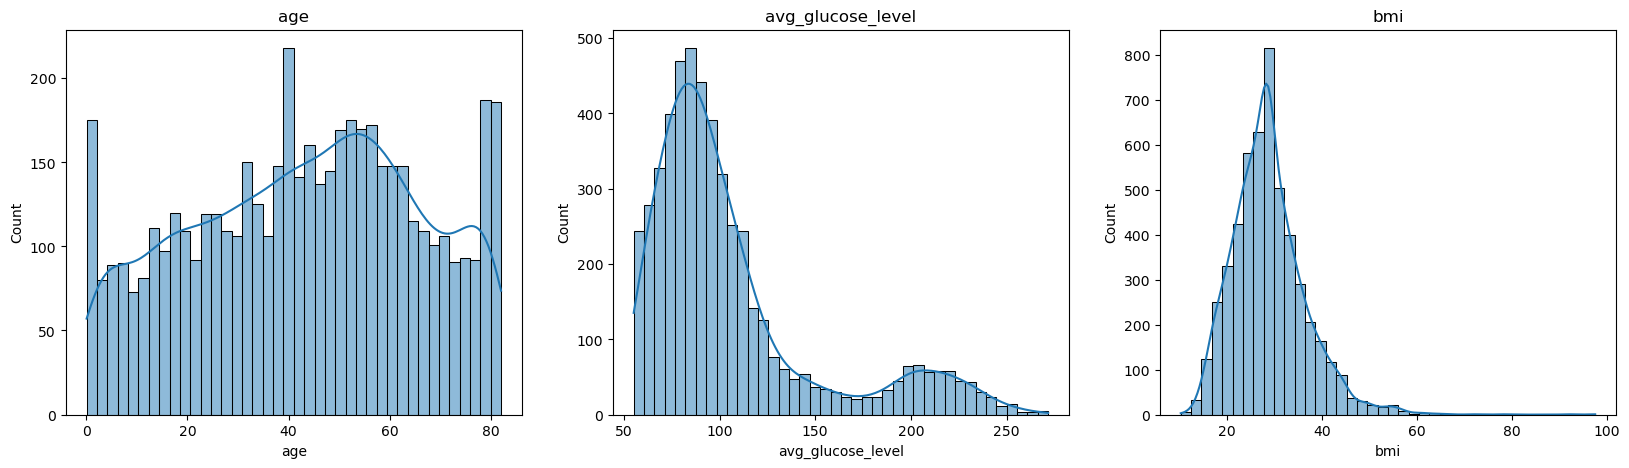

In [16]:
def skewness(data):
    s = []
    fig, axes = plt.subplots(1, len(data.columns), figsize=(20, 5))
    for i, col in enumerate(data.columns):
        sk = skew(data[col])
        print("Column_Name       Skewness\n")
        print(f"{col} ---> {sk}\n")
        sns.histplot(data[col], bins=40, ax=axes[i],kde=True)
        axes[i].set_title(col)
        if (sk > 0.45) or (sk < -0.45):
            s.append(col)
    print('\nList of Fetures High Skewness --->',s)
    plt.show()

skewness(continues_df)


### 2) Discrete data

In [17]:
discrete_df.head(2)

,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1


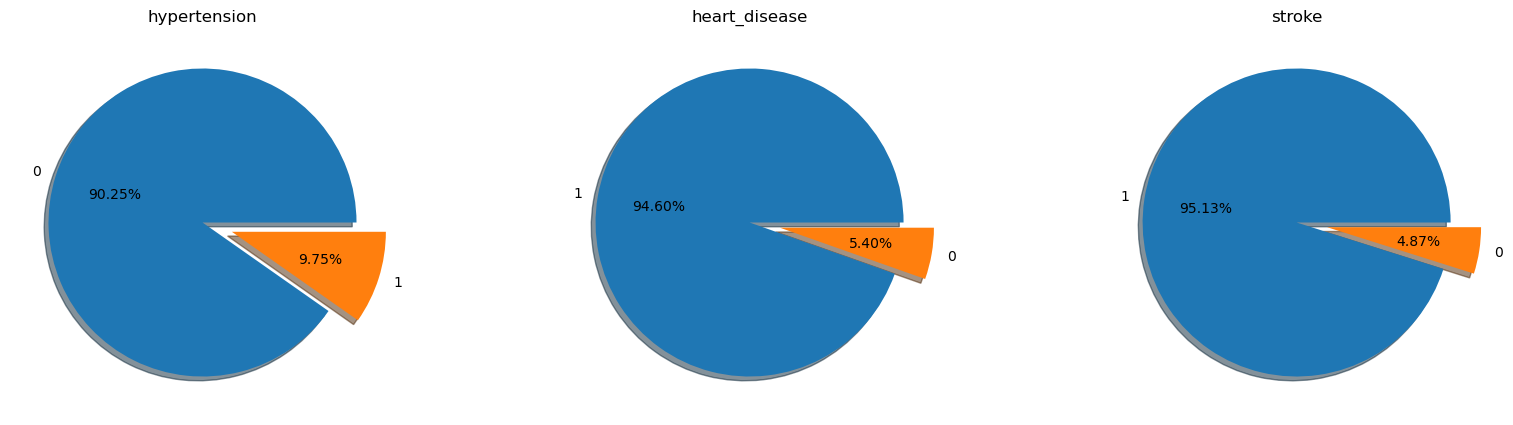

In [18]:
fig, axes = plt.subplots(1, len(discrete_df.columns), figsize=(20, 5))

for i, col in enumerate(discrete_df.columns):
    sizes = discrete_df[col].value_counts().values
    labels = discrete_df[col].unique()
    axes[i].pie(sizes, labels=labels, autopct='%1.2f%%', explode=[0, 0.2], shadow=True)
    axes[i].set_title(col)

plt.show()


### 3) Categorical Data

In [19]:
categorical_df.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


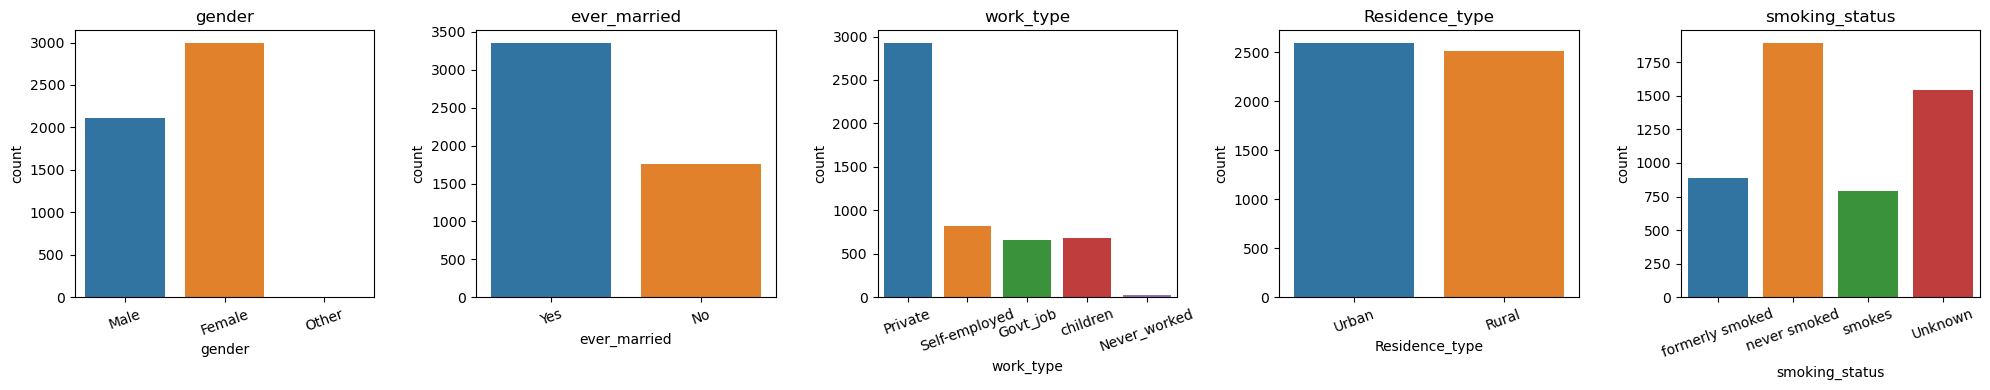

In [20]:
fig, axes = plt.subplots(1,len(categorical_df.columns), figsize=(20, 4))

for i, col in enumerate(categorical_df.columns):
    sns.countplot(x=col, data=categorical_df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()


## Feature Engineering

## Continues_data Handle

### Remove Outliers

In [21]:
def Outlier_Handles(data):
        for col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower,upper = Q1-(1.5* IQR),Q3 + (1.5 * IQR)
            
            data[col] = np.where((data[col]>upper)| (data[col]<lower),data[col].mean(),data[col])
#             data = data[~((data[col]>upper) | (data[col]<lower))]
        return data

In [22]:
new = Outlier_Handles(continues_df)

All Features that have Outliers ---> ['avg_glucose_level', 'bmi']


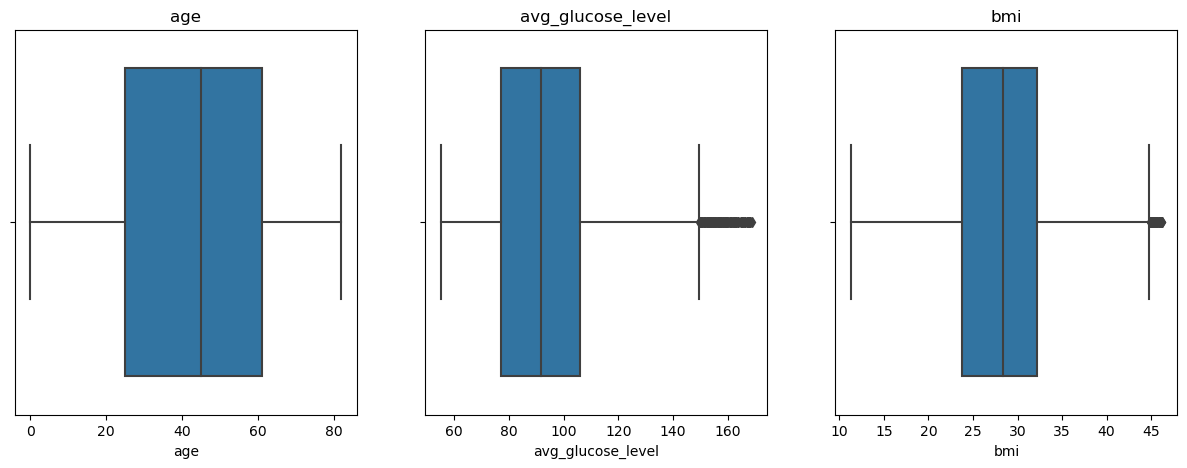

In [23]:
Outliers_show(new)

Column_Name       Skewness

age ---> -0.1370190866396024

Column_Name       Skewness

avg_glucose_level ---> 0.6360501692472009

Column_Name       Skewness

bmi ---> 0.2889462182074268


List of Fetures High Skewness ---> ['avg_glucose_level']


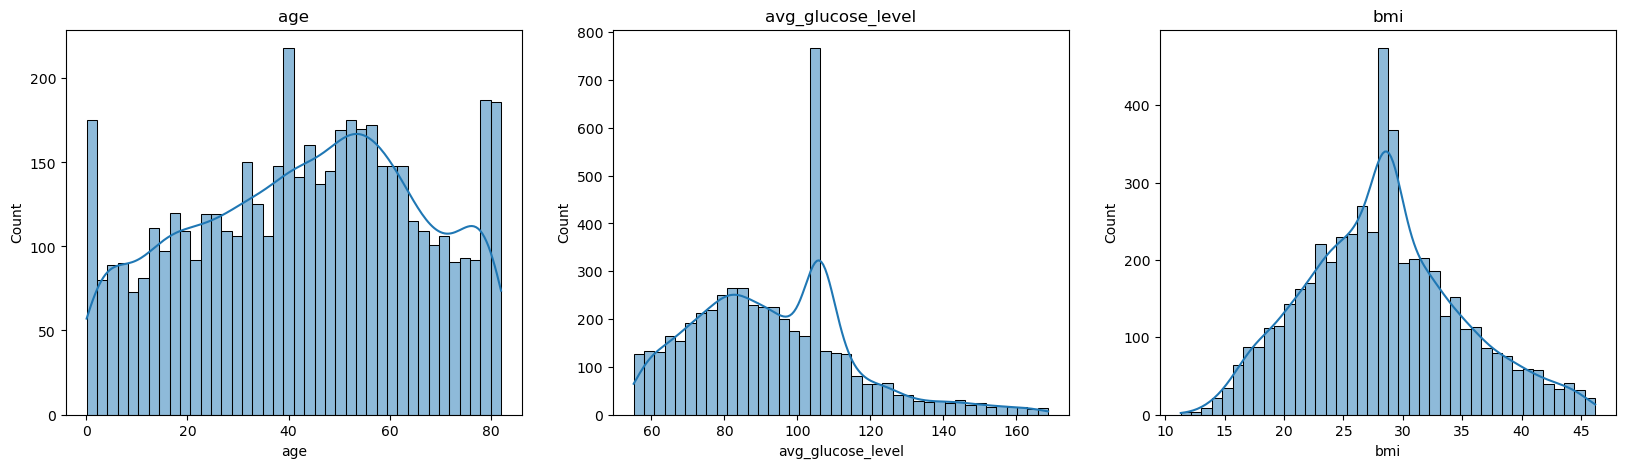

In [24]:
skewness(new)

In [25]:
# # After handling outliers, we see highly positively skewness in average glucose level feature. So we handle it using log method.

avg_glucose_level = np.log(stroke_df['avg_glucose_level'])
# continues_df.drop(['avg_glucose_level'],inplace=True,axis = 1)

# continues_df = pd.concat([continues_df,avg_glucose_level],axis = 1)

In [26]:
continues_df.head()

,age,avg_glucose_level,bmi
0,67.0,106.147677,36.6
1,61.0,106.147677,28.7
2,80.0,105.920000,32.5
3,49.0,106.147677,34.4
4,79.0,106.147677,24.0


## Categorical Data Handle

In [27]:
# Handle categorical data using get dummies method.

categorical_df = pd.get_dummies(categorical_df,drop_first=True)

In [28]:
print(categorical_df.shape)
categorical_df.head(2)

(5110, 11)


,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,0,0,0,1,0


#### Concate all data continues,discrete,categorical 

In [29]:
new_stroke_df = pd.concat([continues_df,discrete_df,categorical_df],axis=1)

In [30]:
new_stroke_df.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,106.147677,36.6,0,1,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,106.147677,28.7,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,105.920000,32.5,0,1,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,106.147677,34.4,0,0,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,106.147677,24.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


#### Compaire old stroke data shape and new stroke data shape

In [31]:
print(stroke_df.shape,new_stroke_df.shape)

(5110, 12) (5110, 17)


In [32]:
st_cols = new_stroke_df.columns

In [33]:
st_cols

Index(['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

### standardization 

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
stroke_df_std = sc.fit_transform(new_stroke_df)
stroke_df_std

array([[ 1.05143428,  0.59367365,  1.2688822 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007,  0.59367365,  0.06236307, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008,  0.58320164,  0.64271404, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.47146341,  0.35253856, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639,  3.35991901, -0.41108115, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.36613489, -0.31944678, ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [37]:
stroke_df_std = pd.DataFrame(stroke_df_std, columns=st_cols)
stroke_df_std.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0.593674,1.268882,-0.328602,4.185032,4.418381,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313
1,0.786070,0.593674,0.062363,-0.328602,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
2,1.626390,0.583202,0.642714,-0.328602,4.185032,4.418381,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
3,0.255342,0.593674,0.932890,-0.328602,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,-0.766774,2.340204
4,1.582163,0.593674,-0.655439,3.043196,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313


In [38]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in oneshot

from sklearn.decomposition import PCA

# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 17 to 5)

pca = PCA(n_components=2, random_state=123)
df_pca = pca.fit_transform(stroke_df_std)
df_pca.transpose() 

In [39]:
# df_pca.shape

In [40]:
# len(pca.components_.T)

In [41]:
# df_pca_loading = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

In [42]:
# df_pca_loading

## Modeling

1. K-Means
2. AgglomerativeClustering
3. DBSCAN

### 1) K-Means

In [43]:
WCSS = []
for k in range(1,20):
    K_means = KMeans(n_clusters= k, init='k-means++')
    K_means.fit(stroke_df_std)
    WCSS.append(K_means.inertia_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'WCSS':WCSS})
frame

,Cluster,WCSS
0,1,86870.000000
1,2,74929.187289
2,3,67749.449516
3,4,62797.343306
4,5,57484.937538
5,6,52876.856037
6,7,48877.972040
7,8,44941.341542
8,9,40971.238026
9,10,37588.003977


### Elbow Plot

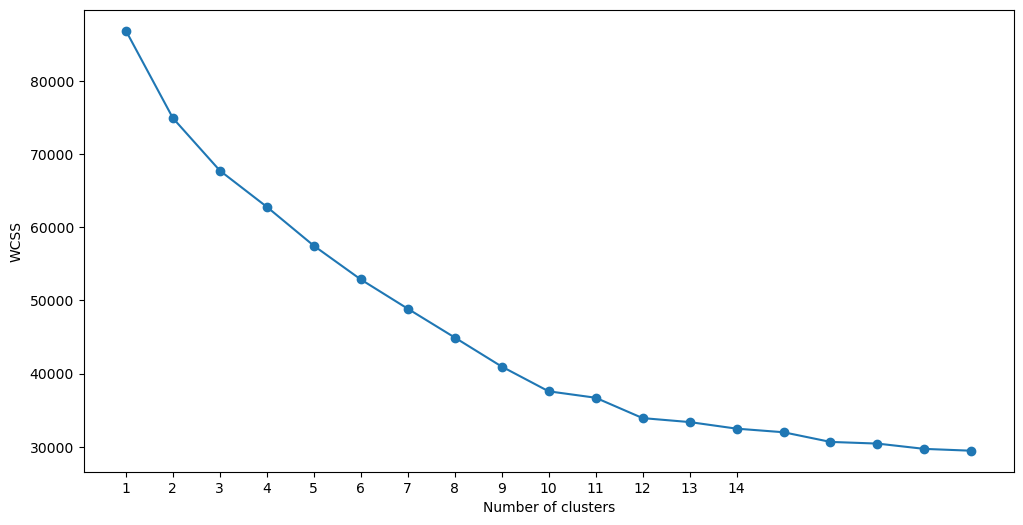

In [44]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['WCSS'],marker = 'o')
plt.xticks(range(1,15))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 7, init='k-means++',random_state=121)
kmeans.fit(stroke_df_std)
pred = kmeans.predict(stroke_df_std)
pred

array([5, 5, 5, ..., 2, 4, 3])

In [46]:
stroke_df_std['K_Mean_Clusters'] = pred

In [47]:
stroke_df_std['K_Mean_Clusters'].value_counts()

3    2157
2     754
1     687
0     651
4     612
5     248
6       1
Name: K_Mean_Clusters, dtype: int64

In [48]:
stroke_df_std.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,K_Mean_Clusters
0,1.051434,0.593674,1.268882,-0.328602,4.185032,4.418381,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313,5
1,0.786070,0.593674,0.062363,-0.328602,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,5
2,1.626390,0.583202,0.642714,-0.328602,4.185032,4.418381,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,5
3,0.255342,0.593674,0.932890,-0.328602,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,-0.766774,2.340204,5
4,1.582163,0.593674,-0.655439,3.043196,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,5


In [79]:
K_Means_R = metrics.silhouette_score(stroke_df_std,stroke_df_std['K_Mean_Clusters'])

### 2) AgglomerativeClustering

In [50]:
n_clust = []
linkage = []
silhouette_sc = []
for i in range(2,20):
    for l in ['ward', 'complete', 'average', 'single']:
        print(i,l)
        agm = AgglomerativeClustering(n_clusters=i,linkage=l)
        agm.fit(stroke_df_std)
        n_clust.append(i)
        linkage.append(l)
        if pd.Series(agm.labels_).nunique() <2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(metrics.silhouette_score(stroke_df_std[st_cols],agm.labels_))

2 ward
2 complete
2 average
2 single
3 ward
3 complete
3 average
3 single
4 ward
4 complete
4 average
4 single
5 ward
5 complete
5 average
5 single
6 ward
6 complete
6 average
6 single
7 ward
7 complete
7 average
7 single
8 ward
8 complete
8 average
8 single
9 ward
9 complete
9 average
9 single
10 ward
10 complete
10 average
10 single
11 ward
11 complete
11 average
11 single
12 ward
12 complete
12 average
12 single
13 ward
13 complete
13 average
13 single
14 ward
14 complete
14 average
14 single
15 ward
15 complete
15 average
15 single
16 ward
16 complete
16 average
16 single
17 ward
17 complete
17 average
17 single
18 ward
18 complete
18 average
18 single
19 ward
19 complete
19 average
19 single


In [51]:
# 'ward' minimizes the variance of the clusters being merged.
# 'average' uses the average of the distances of each observation of the two sets.
# 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.
# 'single' uses the minimum of the distances between all observations of the two sets.

In [52]:
pd.Series(agm.labels_).nunique()

19

In [53]:
df_scores = pd.DataFrame(list(zip(n_clust,linkage,silhouette_sc)),
                         columns=['K','linkage','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,K,linkage,score
2,2,average,0.924747
3,2,single,0.924747
1,2,complete,0.924747
5,3,complete,0.672956
6,3,average,0.672956
...,...,...,...
8,4,ward,0.164746
41,12,complete,0.163913
45,13,complete,0.162859
0,2,ward,0.146618


In [54]:
import scipy.cluster.hierarchy as shc

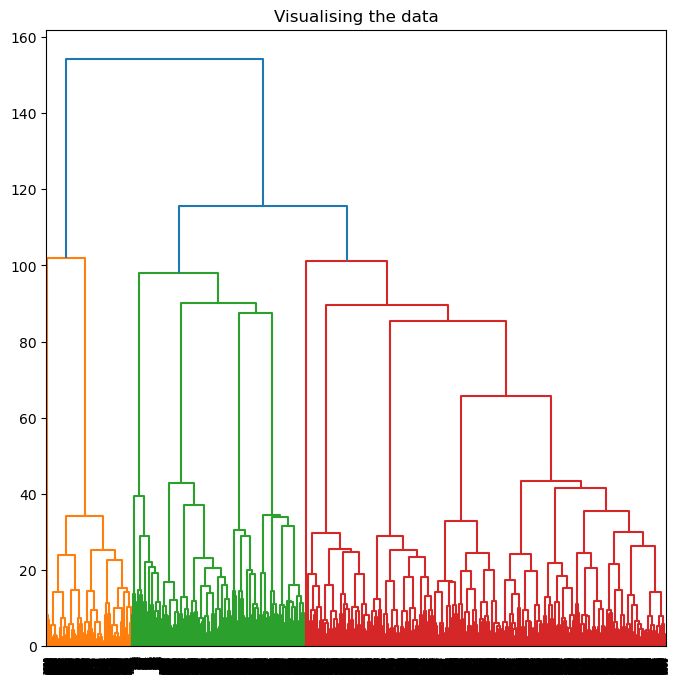

In [55]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(stroke_df_std[st_cols], method ='ward')))

In [56]:
agm2 = AgglomerativeClustering(n_clusters =2, linkage = 'ward')
agm2_pred = agm2.fit_predict(stroke_df_std)

In [57]:
stroke_df_std['AGM_Cluster'] = agm2_pred

In [80]:
AGM_R = metrics.silhouette_score(stroke_df_std[st_cols],stroke_df_std['AGM_Cluster'])

### 3) DBSCAN (Density based spatial clustering application noise)

In [59]:
eps = []   # Estimation points that are known as Core pointt
min_samples = []
shiloutte_sc = []
for e in [x/10 for x in range(1,15)]:
    for ms in range(2,20):
        print(e,ms)
        dbscan = DBSCAN(eps = e , min_samples=ms , n_jobs=-1)
        dbscan.fit(stroke_df_std)
        eps.append(e)
        min_samples.append(ms)
        if pd.Series(dbscan.labels_).nunique() < 2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(metrics.silhouette_score(stroke_df_std[st_cols],dbscan.labels_))
            

0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 7
0.1 8
0.1 9
0.1 10
0.1 11
0.1 12
0.1 13
0.1 14
0.1 15
0.1 16
0.1 17
0.1 18
0.1 19
0.2 2
0.2 3
0.2 4
0.2 5
0.2 6
0.2 7
0.2 8
0.2 9
0.2 10
0.2 11
0.2 12
0.2 13
0.2 14
0.2 15
0.2 16
0.2 17
0.2 18
0.2 19
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7
0.3 8
0.3 9
0.3 10
0.3 11
0.3 12
0.3 13
0.3 14
0.3 15
0.3 16
0.3 17
0.3 18
0.3 19
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.5 2
0.5 3
0.5 4
0.5 5
0.5 6
0.5 7
0.5 8
0.5 9
0.5 10
0.5 11
0.5 12
0.5 13
0.5 14
0.5 15
0.5 16
0.5 17
0.5 18
0.5 19
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.6 10
0.6 11
0.6 12
0.6 13
0.6 14
0.6 15
0.6 16
0.6 17
0.6 18
0.6 19
0.7 2
0.7 3
0.7 4
0.7 5
0.7 6
0.7 7
0.7 8
0.7 9
0.7 10
0.7 11
0.7 12
0.7 13
0.7 14
0.7 15
0.7 16
0.7 17
0.7 18
0.7 19
0.8 2
0.8 3
0.8 4
0.8 5
0.8 6
0.8 7
0.8 8
0.8 9
0.8 10
0.8 11
0.8 12
0.8 13
0.8 14
0.8 15
0.8 16
0.8 17
0.8 18
0.8 19
0.9 2
0.9 3
0.9 4
0.9 5
0.9 6
0.9 7
0.9 8
0.9 9
0.9 10
0

In [61]:
dbscan_df_scores = pd.DataFrame(list(zip(eps,min_samples,silhouette_sc)),
                         columns=['eps','min_samples','score'])
dbscan_df_scores.sort_values(by='score',ascending=False,inplace=True)
dbscan_df_scores

,eps,min_samples,score
2,0.1,4,0.924747
3,0.1,5,0.924747
1,0.1,3,0.924747
5,0.1,7,0.672956
6,0.1,8,0.672956
...,...,...,...
103,0.6,15,-1.000000
102,0.6,14,-1.000000
107,0.6,19,-1.000000
99,0.6,11,-1.000000


In [62]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

In [68]:
def cluster_hyperparam_tune(eps, min_samples, data):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 2:
        return metrics.silhouette_score(data, labels)
    else:
        return -1.0

def optimize_cluster_hyperparams(data,pbounds):
    def objective(eps, min_samples):
        return cluster_hyperparam_tune(eps, min_samples, data)

    optimizer = BayesianOptimization(
        f=objective,
        pbounds=pbounds,
        random_state=121,
        verbose=2
    )
    optimizer.maximize(init_points=5, n_iter=25)
    return optimizer


In [69]:
pbounds = {'eps': (0.1, 5.0), 'min_samples': (2, 10)}



dbscan_optimize = optimize_cluster_hyperparams(stroke_df_std[st_cols],pbounds)

|   iter    |  target   |    eps    | min_sa... |
-------------------------------------------------
| 1         | -0.04046  | 0.6455    | 3.686     |
| 2         | 0.2037    | 1.242     | 3.216     |
| 3         | 0.2797    | 4.168     | 5.263     |
| 4         | 0.2172    | 2.823     | 7.964     |
| 5         | 0.1496    | 1.318     | 9.749     |
| 6         | 0.2797    | 4.125     | 5.221     |
| 7         | 0.2779    | 3.645     | 5.755     |
| 8         | 0.2798    | 4.33      | 6.413     |
| 9         | 0.1662    | 2.093     | 2.56      |
| 10        | 0.2753    | 3.496     | 6.725     |
| 11        | 0.2798    | 4.279     | 7.436     |
| 12        | 0.673     | 4.992     | 8.23      |
| 13        | 0.673     | 5.0       | 8.769     |
| 14        | 0.673     | 5.0       | 9.977     |
| 15        | 0.2791    | 4.086     | 9.996     |
| 16        | 0.673     | 5.0       | 9.454     |
| 17        | 0.673     | 5.0       | 2.0       |
| 18        | 0.673     | 5.0       | 3.119     |


In [70]:
dbscan_params = dbscan_optimize.max['params']
dbscan_params

{'eps': 4.9918334466865915, 'min_samples': 8.22966821870337}

In [71]:
dbscan_params['eps'] = int(dbscan_params['eps'])
dbscan_params['min_samples'] = int(dbscan_params['min_samples'])

In [72]:
dbscan = DBSCAN().set_params(**dbscan_params)
dbscan_pred = dbscan.fit_predict(stroke_df_std[st_cols])

In [74]:
stroke_df_std['DBSCAN_Cluster'] = dbscan_pred

In [81]:
DB_R = metrics.silhouette_score(stroke_df_std[st_cols],stroke_df_std['DBSCAN_Cluster'])

In [78]:
stroke_df_std.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,K_Mean_Clusters,AGM_Cluster,DBSCAN_Cluster
0,1.051434,0.593674,1.268882,-0.328602,4.185032,4.418381,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313,5,1,0
1,0.786070,0.593674,0.062363,-0.328602,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,5,1,1
2,1.626390,0.583202,0.642714,-0.328602,4.185032,4.418381,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,5,1,0
3,0.255342,0.593674,0.932890,-0.328602,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,-0.766774,2.340204,5,1,1
4,1.582163,0.593674,-0.655439,3.043196,-0.238947,4.418381,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313,5,1,1


In [89]:
dict_ = {
    "K_Means" : (K_Means_R),
    "AGM"     : (AGM_R),
    "DBSCAN"  : (DB_R)
}

result = pd.DataFrame(dict_,index=['Scores']).T
result

,Scores
K_Means,0.264714
AGM,0.146618
DBSCAN,0.278966
